# Supplementary file 2: VISUALIZING RELATIONSHIPS 
Visualizing relationships for variables in the caddprhed dataset 
Purpose of this file = compare relationships between variables before and after cleaning the data 

Input1: clinvar_conflicting.csv (df_orig)
Input2: clinvar_cleaned.csv (df_cleaned) 
Output: Several images

References that I learned from: 
[1] https://mode.com/example-gallery/python_histogram/
[2] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

Observations: 
- distributions before and after removing conflicting information are very similar => indicating that there's no difference in these variables 
- loftool and caddphred scores distribution different even though they're measuring pathogenicity for the same rows => interesting, look more into these variables 
- clearly no outliers in loftool => worth looking into outliers in the caddphred dataset 


/var/folders/jg/43bhw16j027fkjq2n5gb5t5m0000gn/T/ipykernel_6390/2958232515.py:8: DtypeWarning: Columns (0,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df_orig = pd.read_csv('clinvar_conflicting.csv')


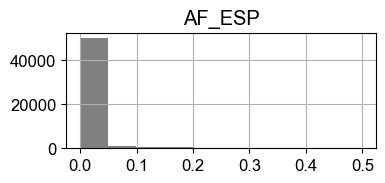

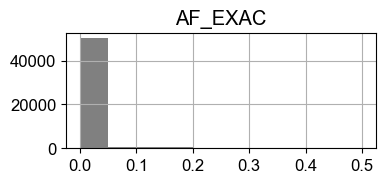

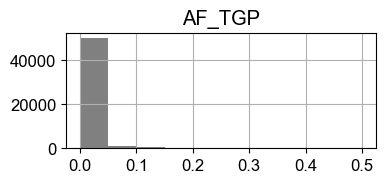

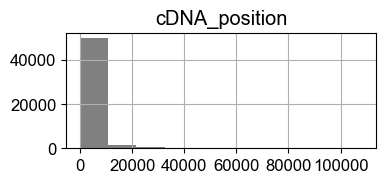

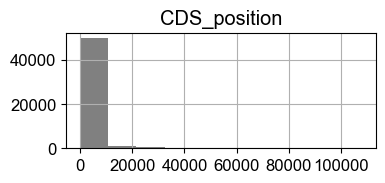

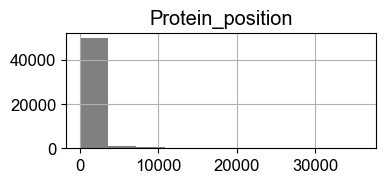

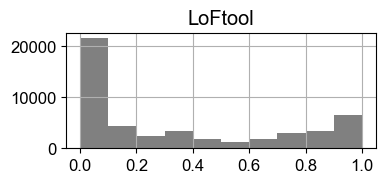

In [9]:
#making histograms for all varaibles 
import pandas as pd 
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial' 
plt.rcParams['font.size'] = 12

df_orig = pd.read_csv('clinvar_conflicting.csv') 

problematic = r'\d+-\d+|d+-\?' 
columns = ['cDNA_position', 'CDS_position', 'Protein_position'] 
for column in columns: 
    correct_columns = ~df_orig[column].str.contains(problematic, na=False)
    df_orig = df_orig[correct_columns] 
    df_orig[column] = pd.to_numeric(df_orig[column], errors = 'coerce') 
    df_orig = df_orig[pd.notna(df_orig[column])]

columns = ['AF_ESP', 'AF_EXAC', 'AF_TGP', 'cDNA_position', 'CDS_position', 'Protein_position', 'LoFtool'] 
#MC, Feature, Codons not used because too many categories
for column in columns:
    df_orig.hist(column = column, figsize = (4,1.5), color = 'grey')
    plt.savefig(f'hist_orig_{column}.png', dpi=800, bbox_inches = 'tight')
    plt.show()
    plt.close()

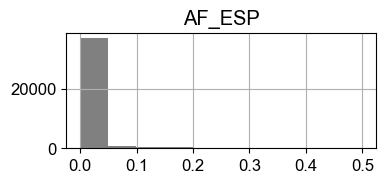

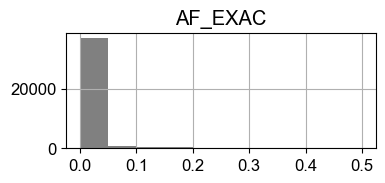

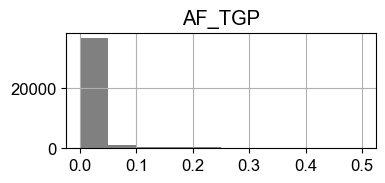

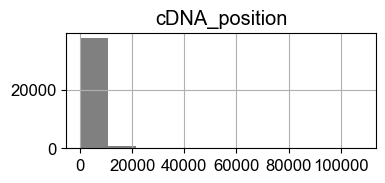

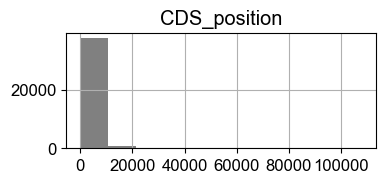

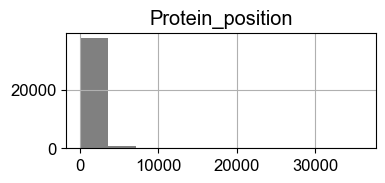

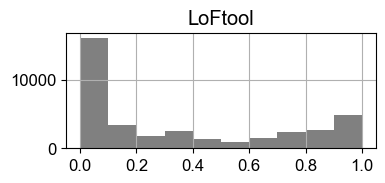

In [10]:
#making histograms for all variables 
import pandas as pd 
plt.rcParams['font.family'] = 'Arial' 
plt.rcParams['font.size'] = 12

df_cleaned = pd.read_csv('clinvar_cleaned.csv') 

columns = ['AF_ESP', 'AF_EXAC', 'AF_TGP', 'cDNA_position', 'CDS_position', 'Protein_position', 'LoFtool'] 
#MC, Feature, Codons not used because too many categories
for column in columns:
    df_cleaned.hist(column = column, figsize = (4,1.5), color = 'grey')
    plt.savefig(f'hist_chart_clean_{column}.png', dpi=800, bbox_inches = 'tight')
    plt.show()
    plt.close()

original


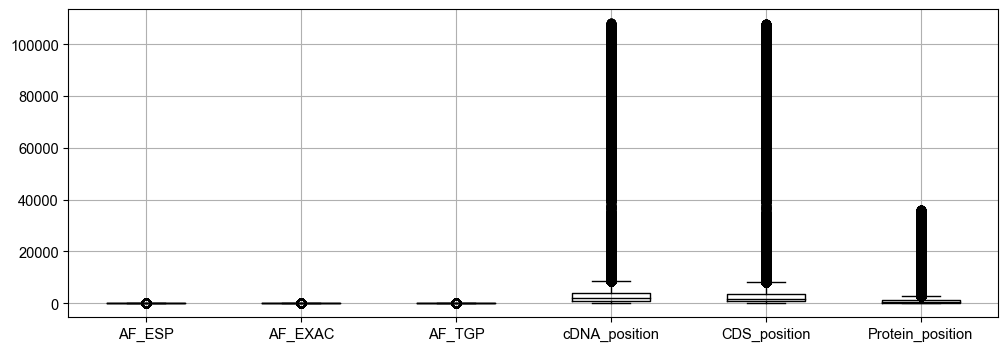

In [27]:
print("original") 
plt.rcParams['font.family'] = 'Arial' 
plt.rcParams['font.size'] = 12
continous_variables = ['AF_ESP', 'AF_EXAC', 'AF_TGP', 'cDNA_position', 'CDS_position', 'Protein_position']
fig, axis = plt.subplots(figsize = (12,4)) 
df_orig.boxplot(column = continous_variables, figsize = (12,8), color = 'black')
axis.tick_params(axis = 'both', which = 'major', labelsize = 10.5) 
plt.savefig('Original_boxplots.png', dpi=800, bbox_inches = 'tight')

cleaned


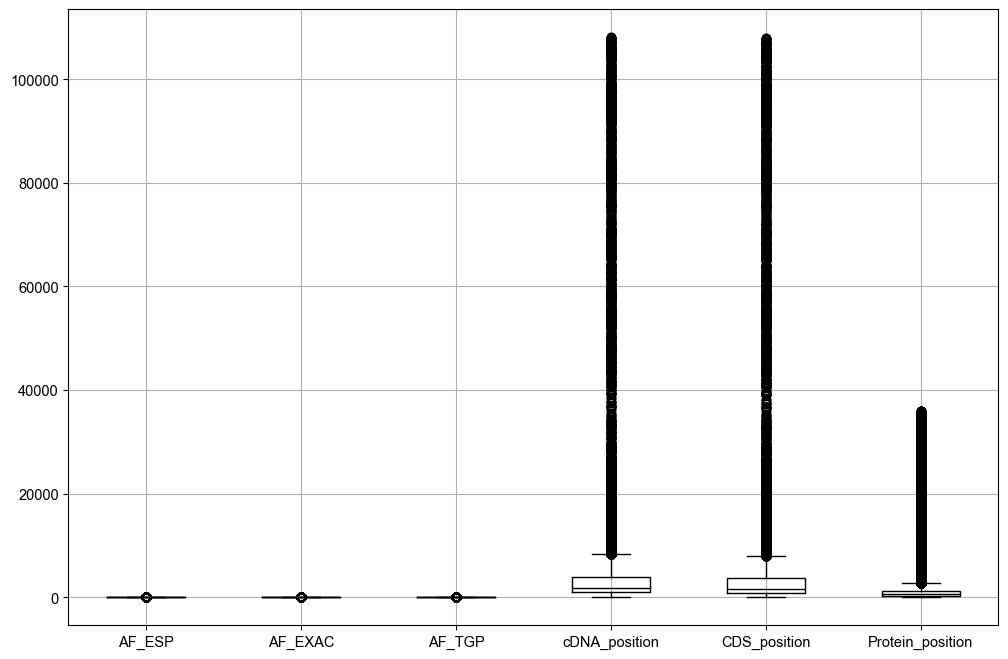

In [14]:
print("cleaned") 
plt.rcParams['font.family'] = 'Arial' 
plt.rcParams['font.size'] = 12
fig, axis = plt.subplots(figsize = (12,8)) 
df_cleaned.boxplot(column = continous_variables, figsize = (12,8), color = 'black')
axis.tick_params(axis = 'both', which = 'major', labelsize = 10.5) 
plt.savefig('cleaned_boxplots.png', dpi=800, bbox_inches = 'tight')

original


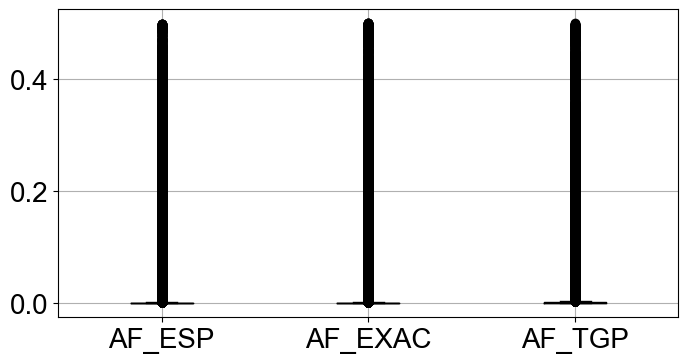

In [45]:
print("original") 
plt.rcParams['font.family'] = 'Arial' 
small_scale = ['AF_ESP', 'AF_EXAC', 'AF_TGP'] 
fig, axis = plt.subplots(figsize = (8,4)) 
df_orig.boxplot(column = small_scale, figsize = (12,4), color = 'black')
axis.tick_params(axis = 'both', which = 'major', labelsize = 20) 
plt.savefig('original_af_boxplots.png', dpi=800, bbox_inches = 'tight')

cleaned


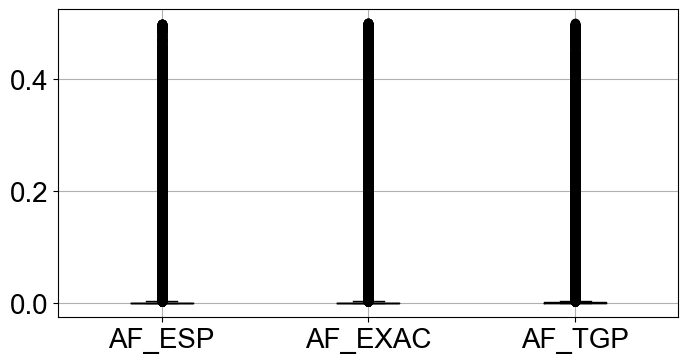

In [46]:
print("cleaned") 
plt.rcParams['font.family'] = 'Arial' 
small_scale = ['AF_ESP', 'AF_EXAC', 'AF_TGP'] 
fig, axis = plt.subplots(figsize = (8,4)) 
df_cleaned.boxplot(column = small_scale, figsize = (12,4), color = 'black')
axis.tick_params(axis = 'both', which = 'major', labelsize = 20) 
plt.savefig('cleaned_af_boxplots.png', dpi=800, bbox_inches = 'tight')

original


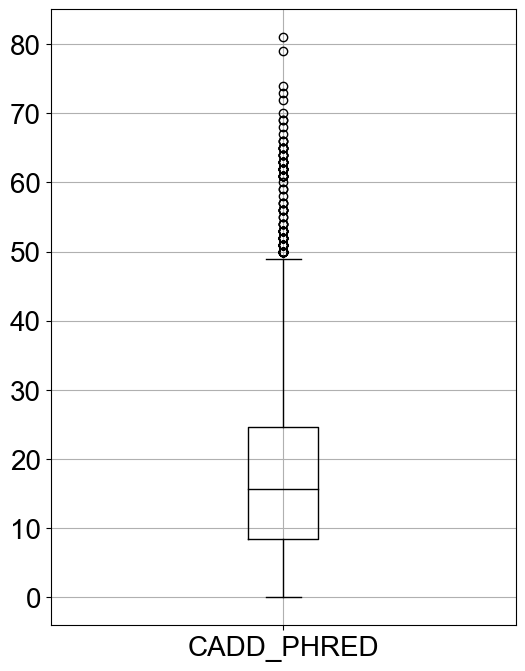

In [18]:
print("original") 
plt.rcParams['font.family'] = 'Arial' 
regular = ['CADD_PHRED'] 
fig, axis = plt.subplots(figsize = (6,8)) 
df_orig.boxplot(column = regular, color = 'black')
axis.tick_params(axis = 'both', which = 'major', labelsize = 20) 
plt.savefig('original_cad_boxplots.png', dpi=800, bbox_inches = 'tight')

cleaned


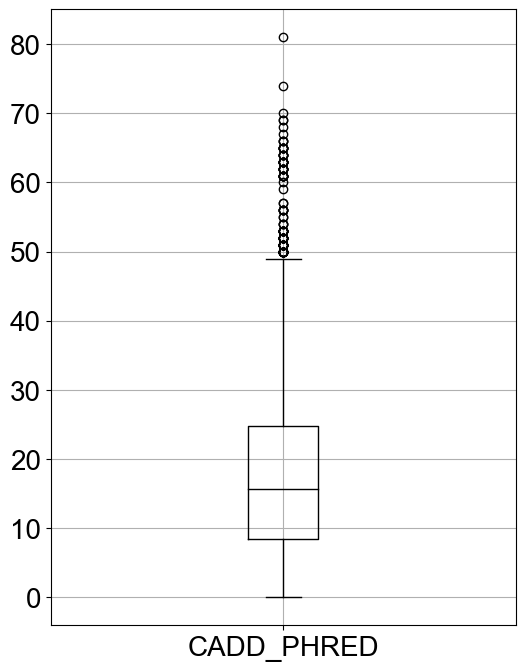

In [19]:
print("cleaned") 
plt.rcParams['font.family'] = 'Arial' 
regular = ['CADD_PHRED'] 
fig, axis = plt.subplots(figsize = (6,8)) 
df_cleaned.boxplot(column = regular, color = 'black')
axis.tick_params(axis = 'both', which = 'major', labelsize = 20) 
plt.savefig('cleaned_cad_boxplots.png', dpi=800, bbox_inches = 'tight')

original


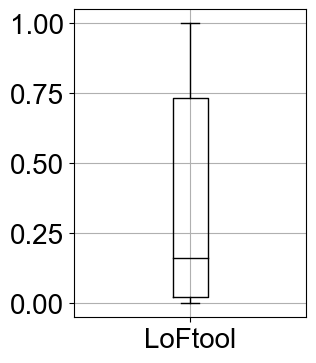

In [39]:
print("original") 
plt.rcParams['font.family'] = 'Arial' 
regular = ['LoFtool'] 
fig, axis = plt.subplots(figsize = (3,4)) 
df_orig.boxplot(column = regular, color = 'black')
axis.tick_params(axis = 'both', which = 'major', labelsize = 20) 
plt.savefig('original_lof_boxplots.png', dpi=800, bbox_inches = 'tight')

cleaned


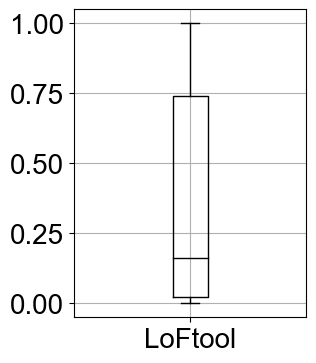

In [38]:
print("cleaned") 
plt.rcParams['font.family'] = 'Arial' 
regular = ['LoFtool'] 
df_cleaned = pd.read_csv('clinvar_cleaned.csv')
fig, axis = plt.subplots(figsize = (3,4)) 
df_cleaned.boxplot(column = regular, color = 'black')
axis.tick_params(axis = 'both', which = 'major', labelsize = 20) 
plt.savefig('cleaned_lof_boxplots.png', dpi=800, bbox_inches = 'tight')

original


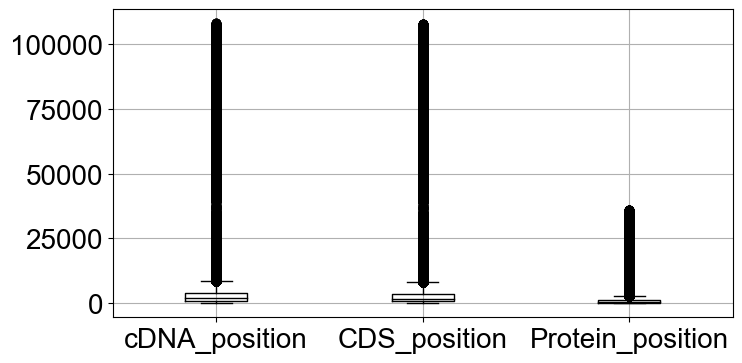

In [43]:
print("original") 
plt.rcParams['font.family'] = 'Arial' 
small_scale = ['cDNA_position', 'CDS_position', 'Protein_position'] 
fig, axis = plt.subplots(figsize = (8,4)) 
df_orig.boxplot(column = small_scale, ax = axis , figsize = (12,8), color = 'black')
axis.tick_params(axis = 'both', which = 'major', labelsize = 20) 
plt.savefig('original_ccc_boxplots.png', dpi=800, bbox_inches = 'tight')

cleaned


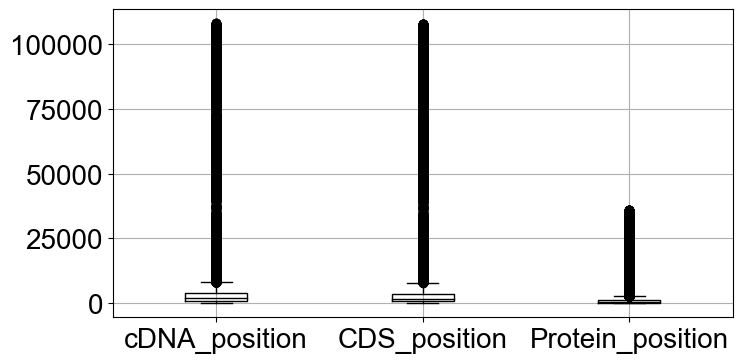

In [44]:
print("cleaned")
plt.rcParams['font.family'] = 'Arial' 
small_scale = ['cDNA_position', 'CDS_position', 'Protein_position'] 
fig, axis = plt.subplots(figsize = (8,4)) 
df_cleaned.boxplot(column = small_scale, ax = axis , figsize = (12,8), color = 'black')
axis.tick_params(axis = 'both', which = 'major', labelsize = 20) 
plt.savefig('cleaned_ccc_boxplots.png', dpi=800, bbox_inches = 'tight')

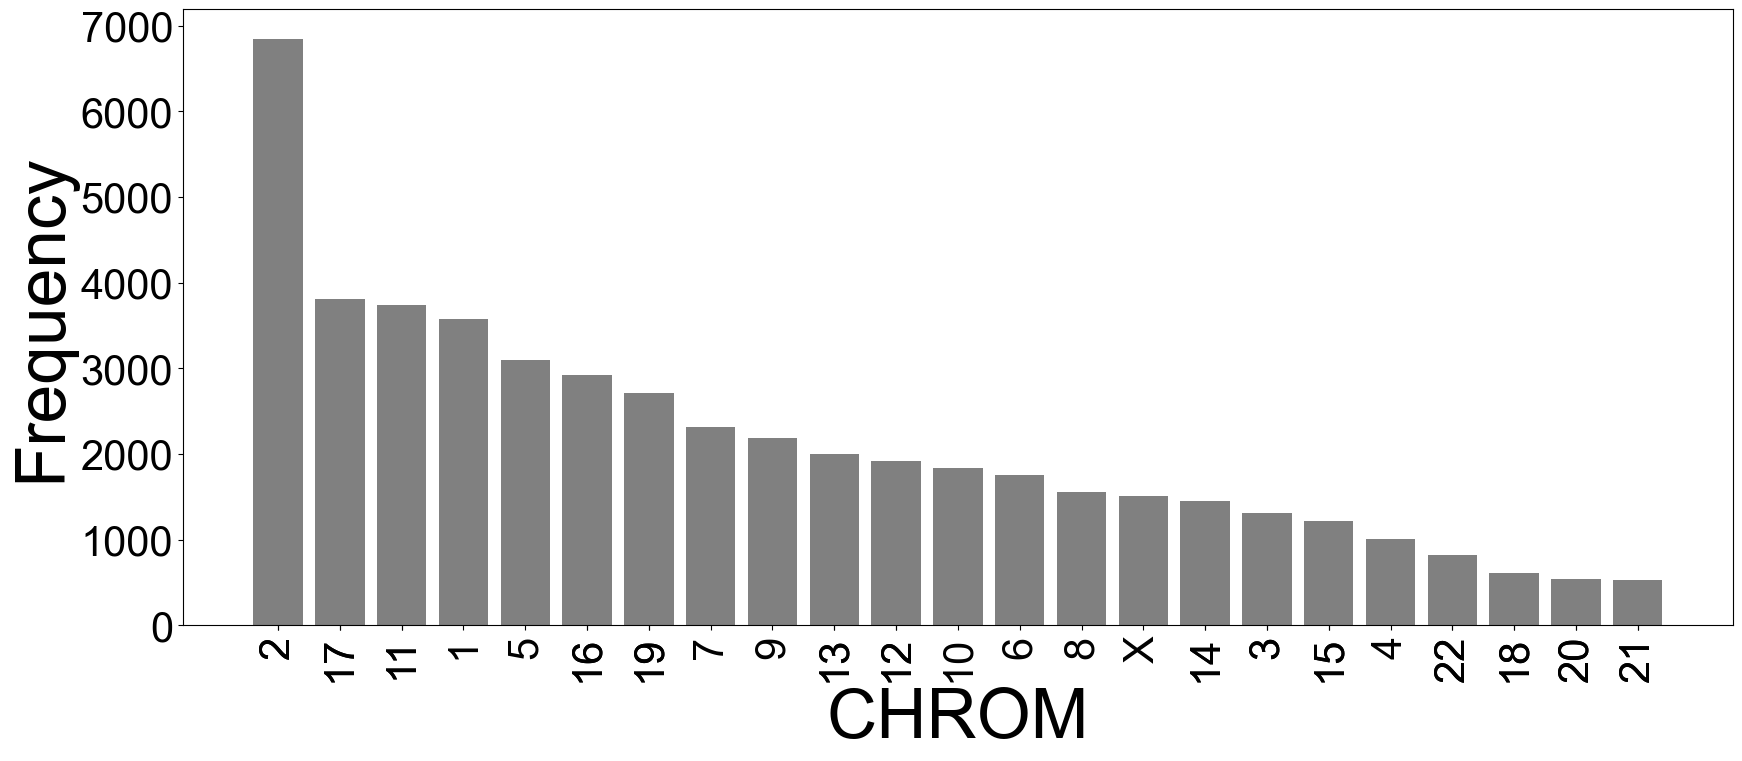

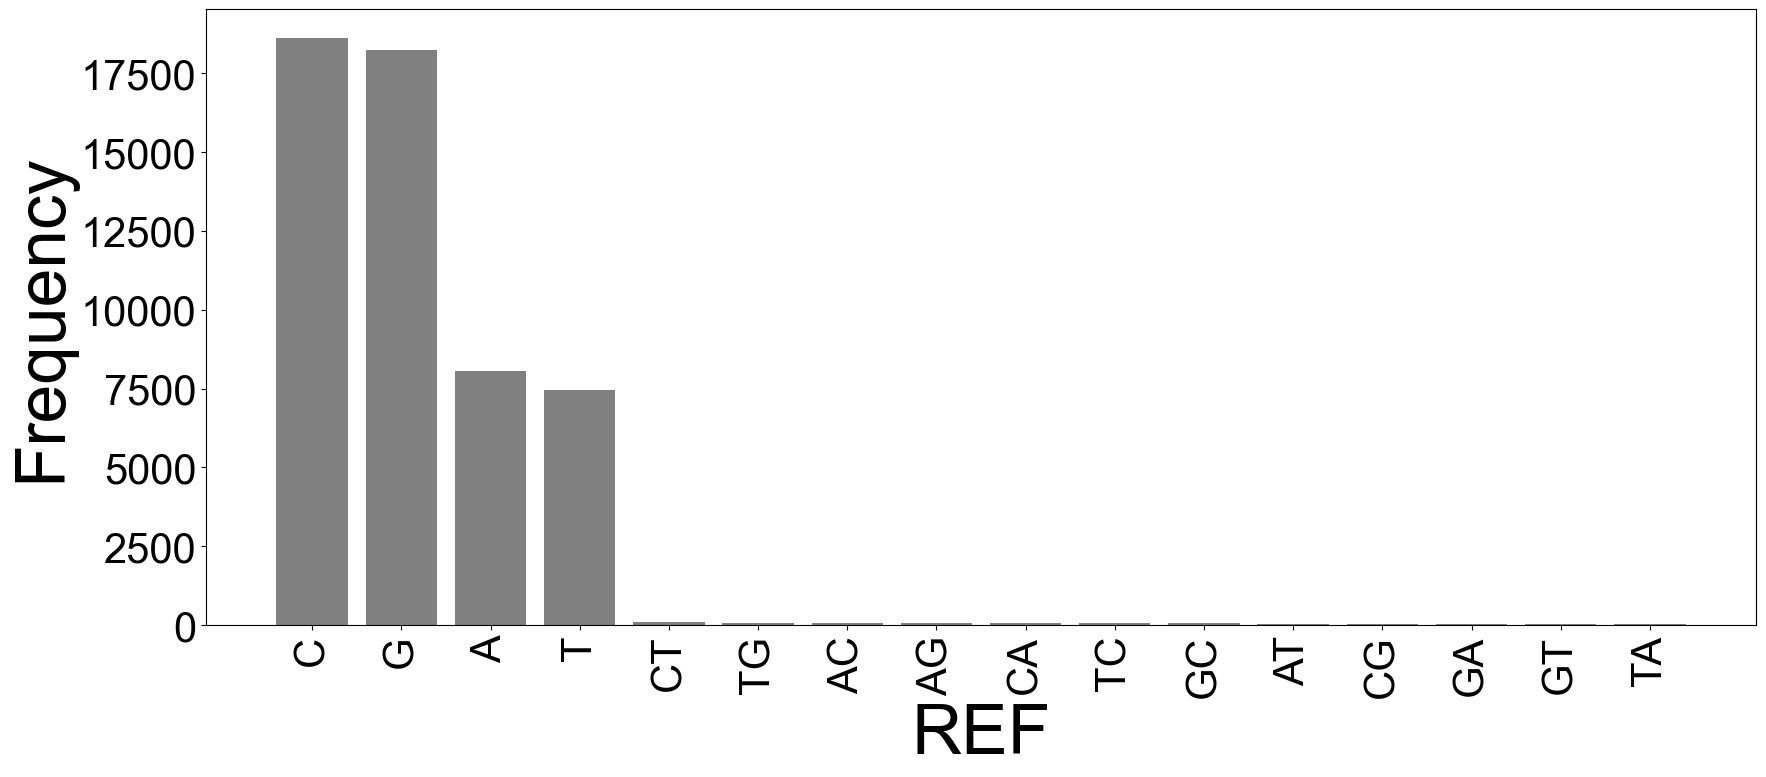

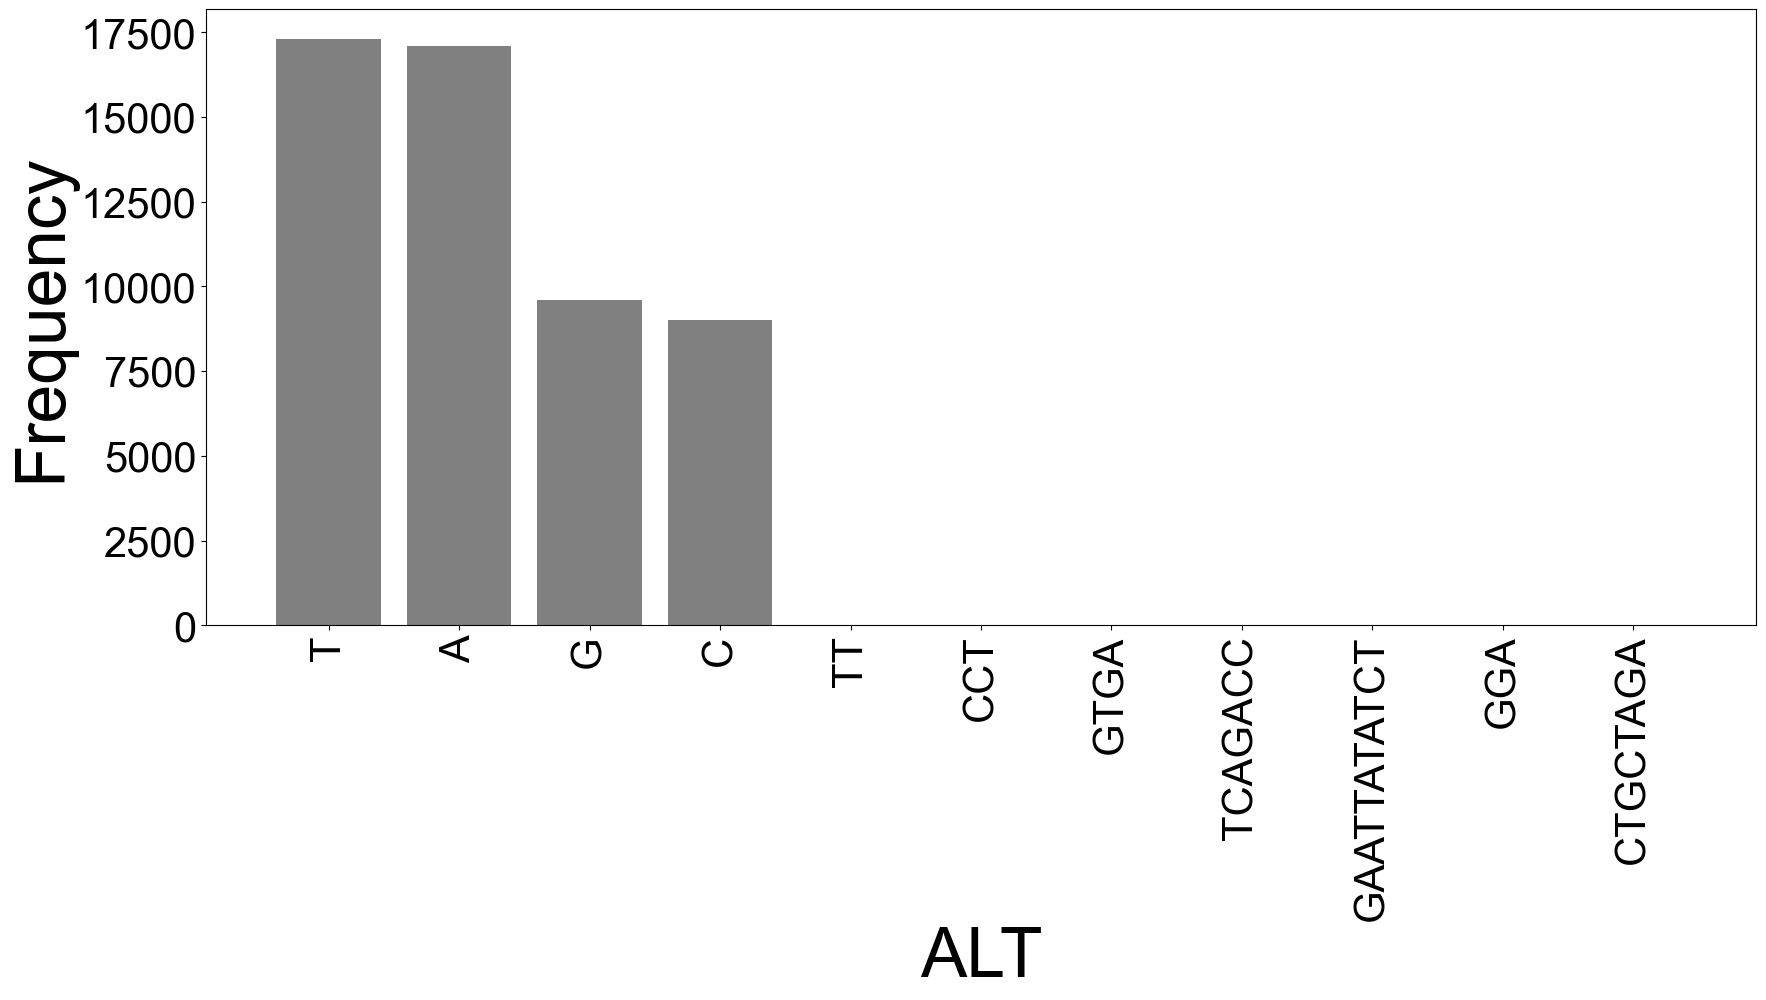

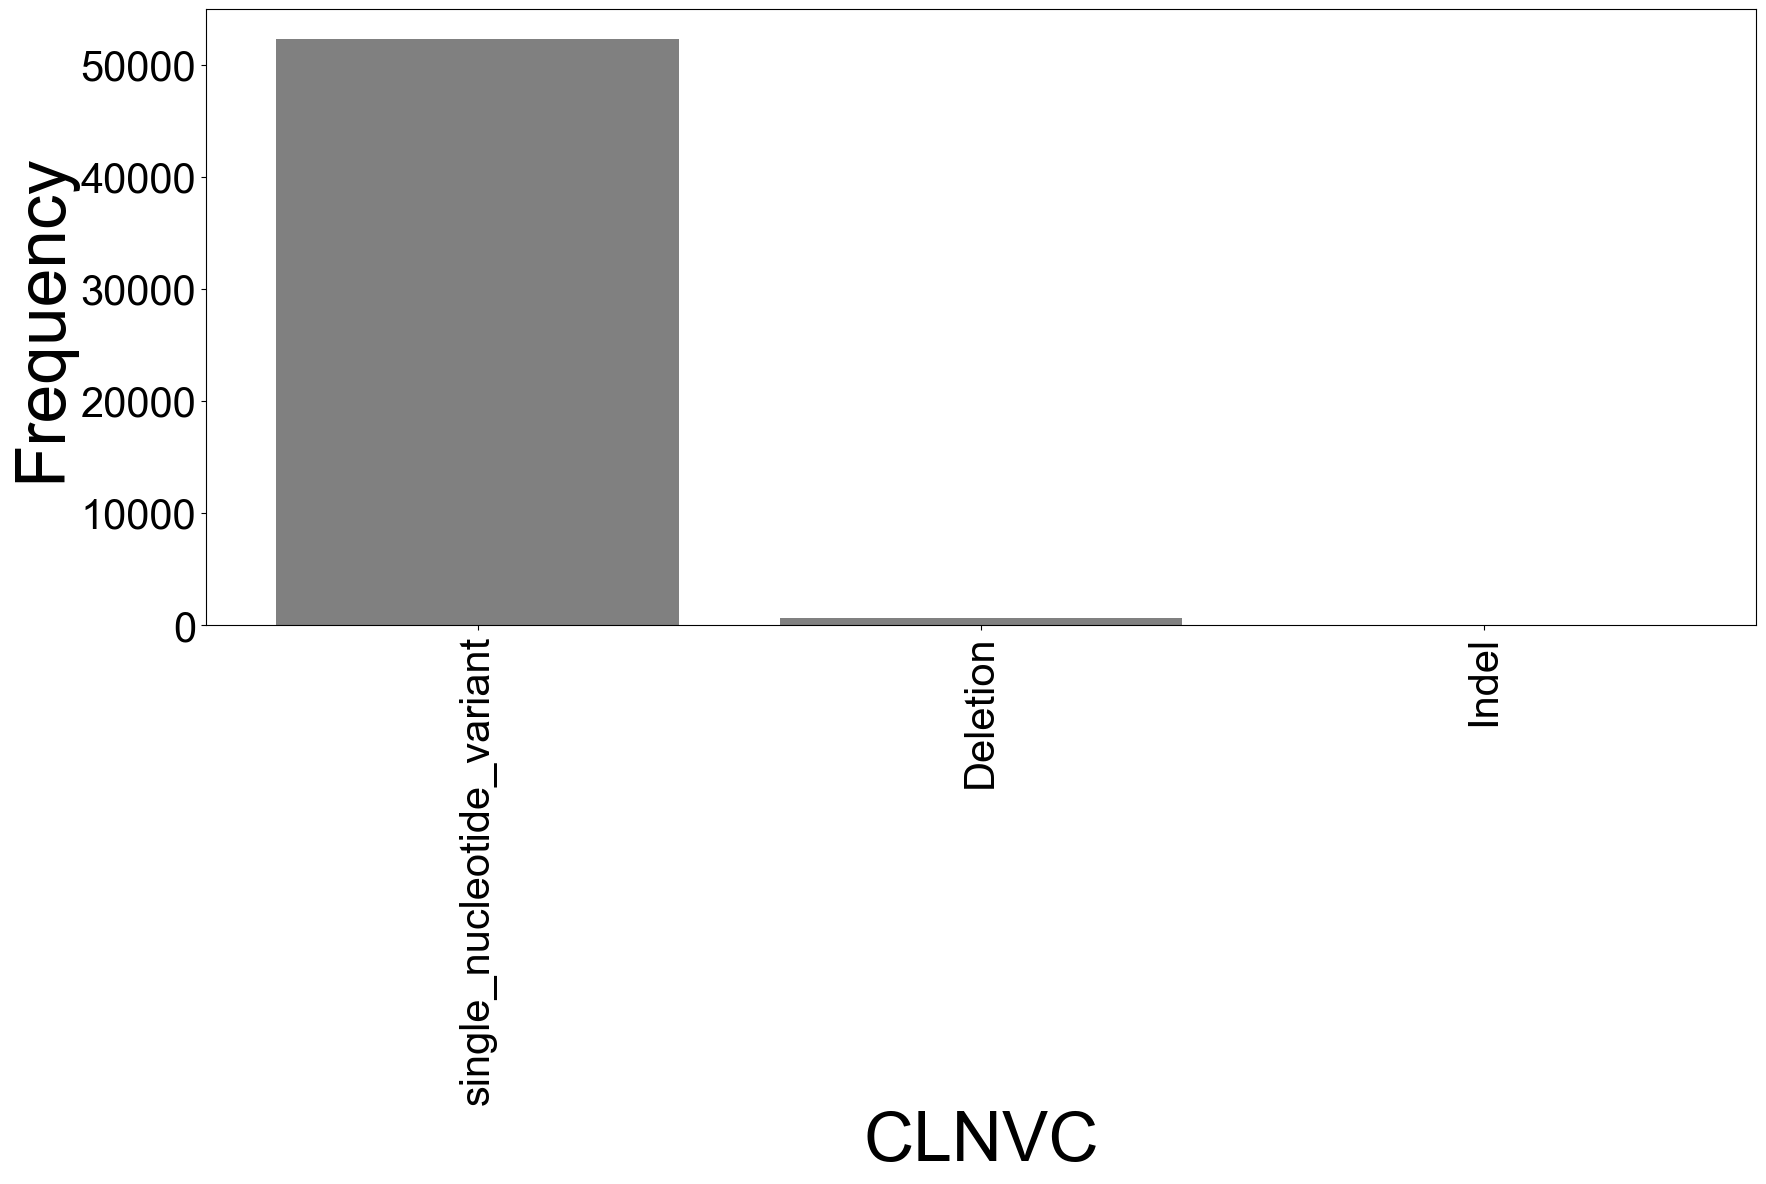

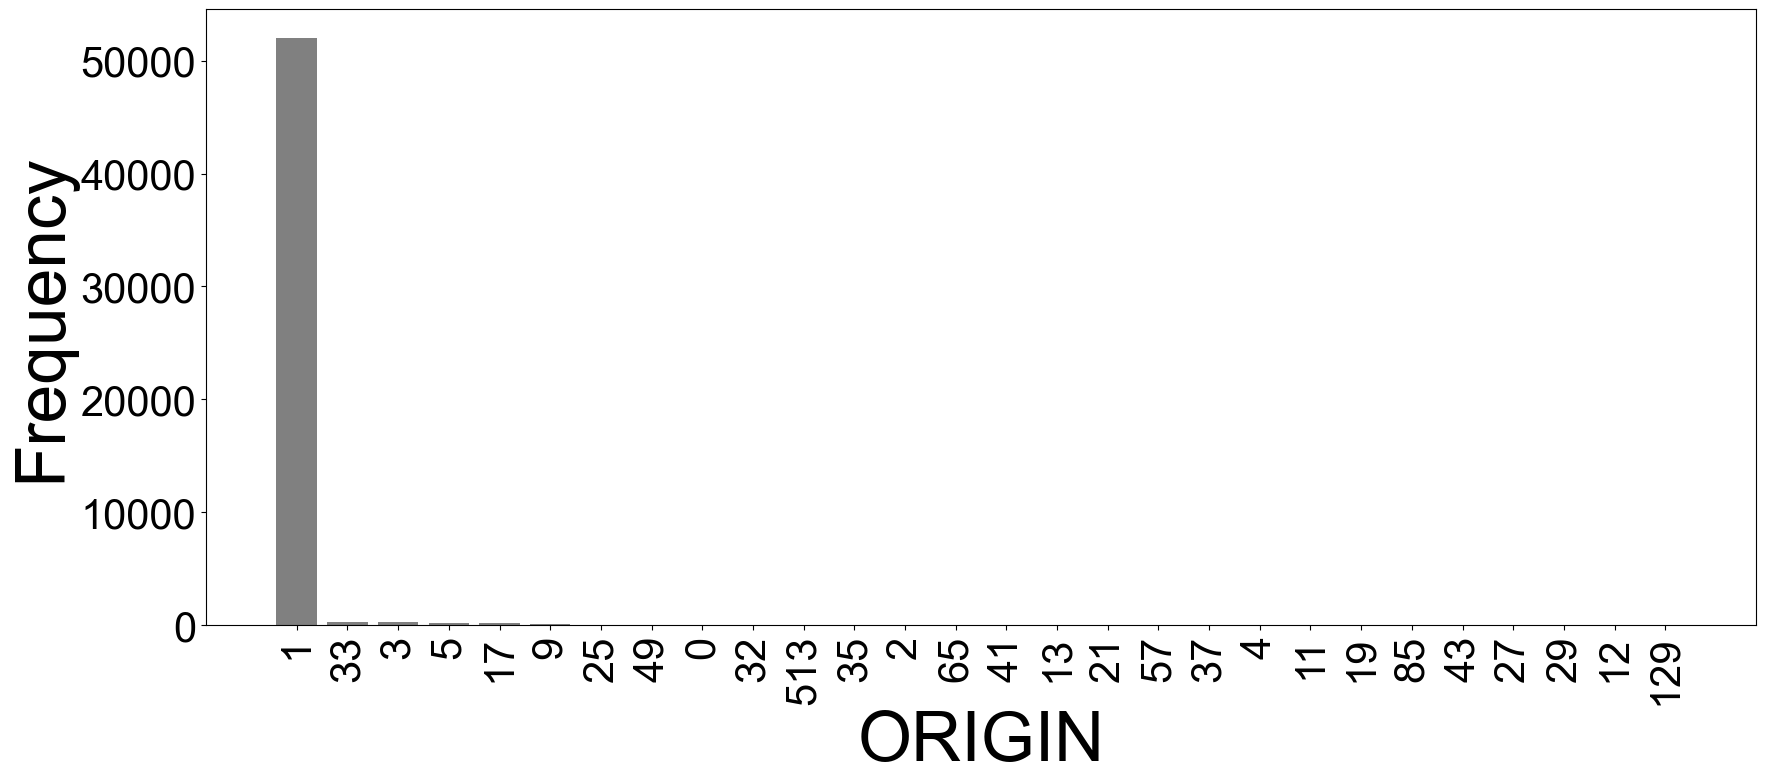

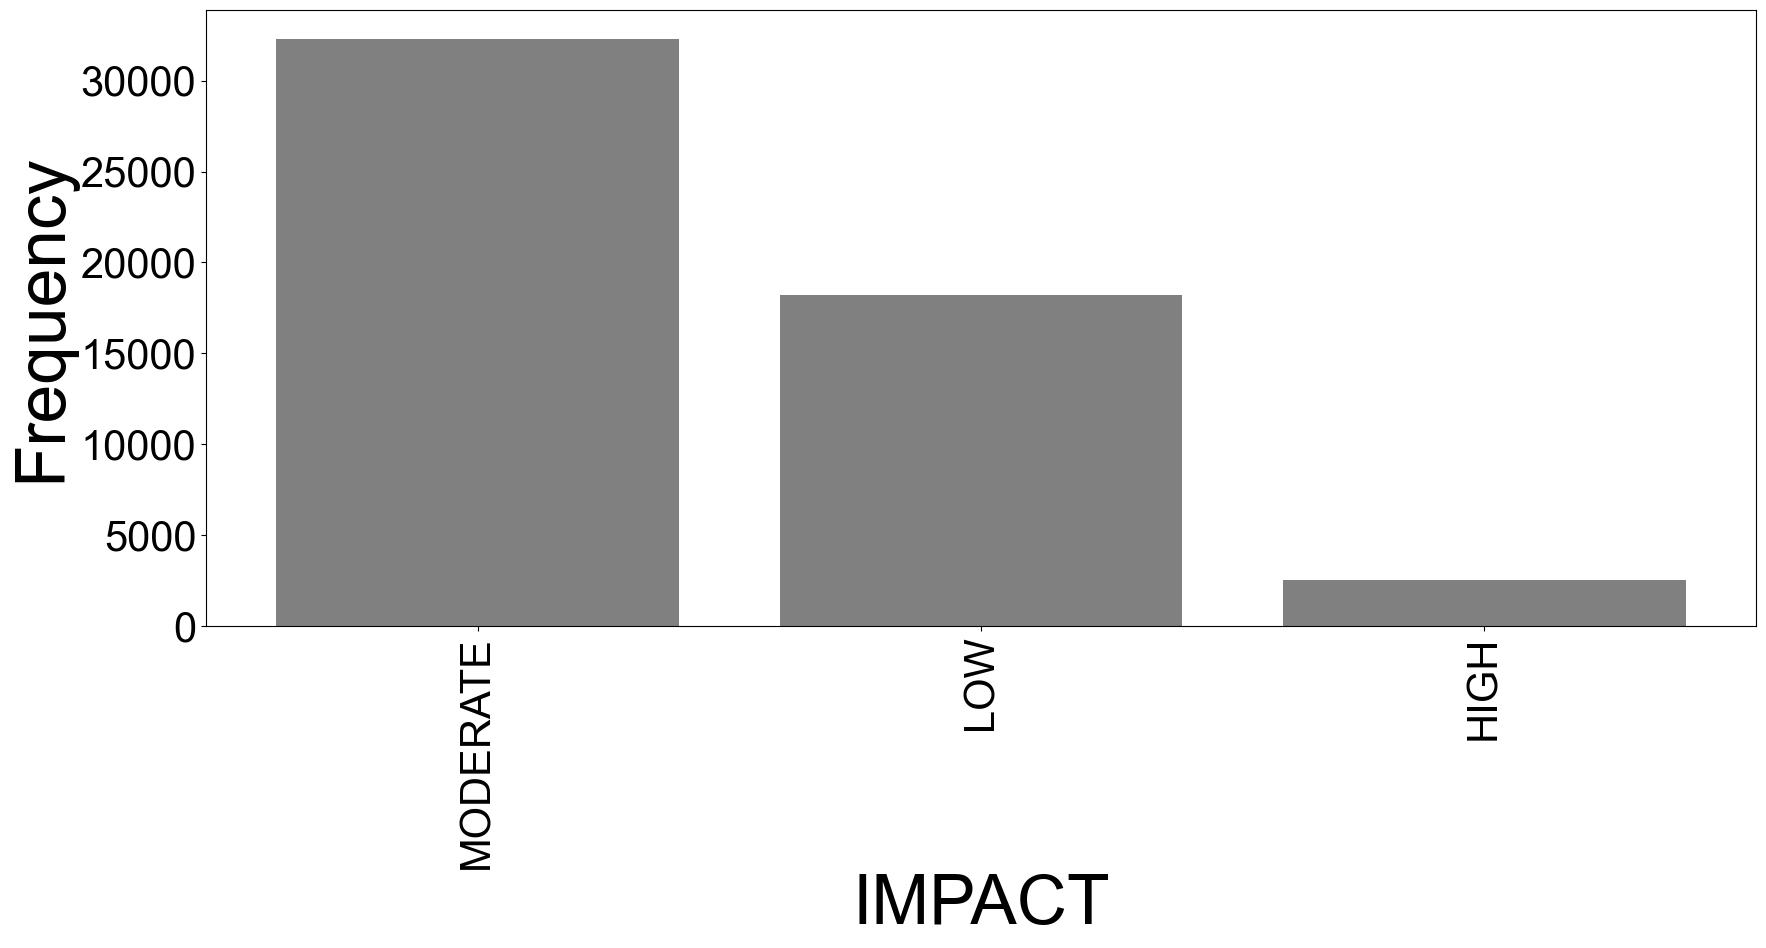

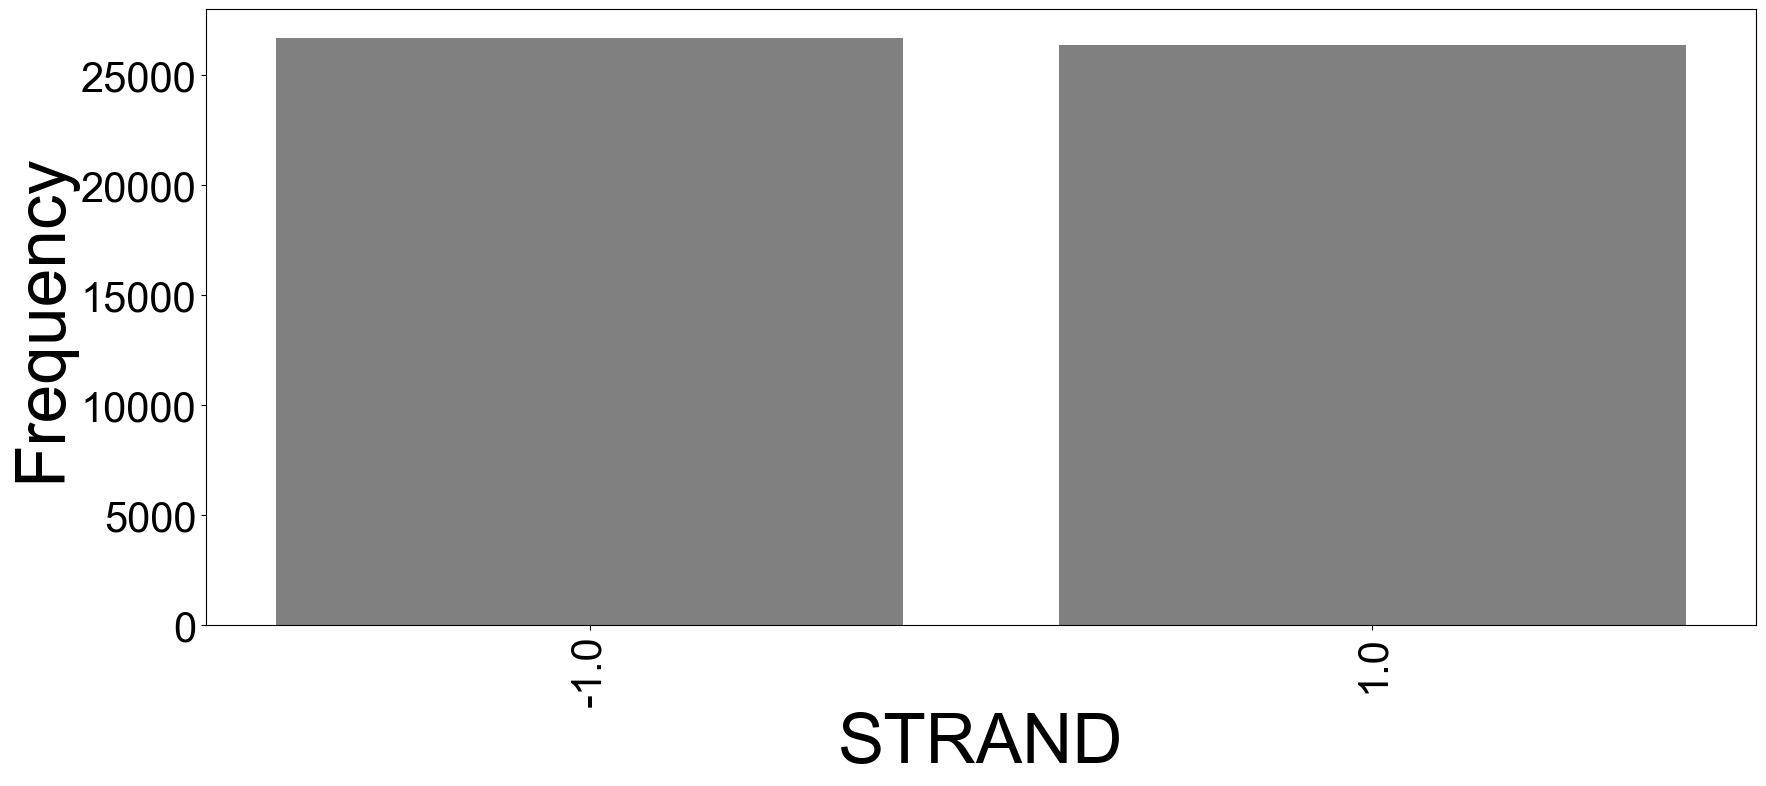

In [24]:
#making bar charts 
#learned some from here; https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
#asked for advice from chatgpt 

import pandas as pd 
from matplotlib import pyplot as plt 

columns = ['CHROM', 'REF', 'ALT', 'CLNVC', 'ORIGIN', 'IMPACT', 'STRAND']
#MC, Feature, Codons not used because too many categories
for column in columns:
    plt.rcParams['font.family'] = 'Arial' 
    counts = df_orig[column].value_counts()
    plt.figure(figsize = (20,8))
    plt.bar(counts.index.astype(str), counts.values, color = 'grey') 
    plt.xticks(counts.index.astype(str), labels=counts.index.astype(str), rotation=90) 
    plt.xlabel(column, fontsize = 50) 
    plt.ylabel("Frequency", fontsize = 50) 
    plt.xticks(fontsize = 30) 
    plt.yticks(fontsize = 30) 
    plt.savefig(f'bar_chart_orig_{column}.png', dpi=800, bbox_inches = 'tight')
    plt.show()
    plt.close()

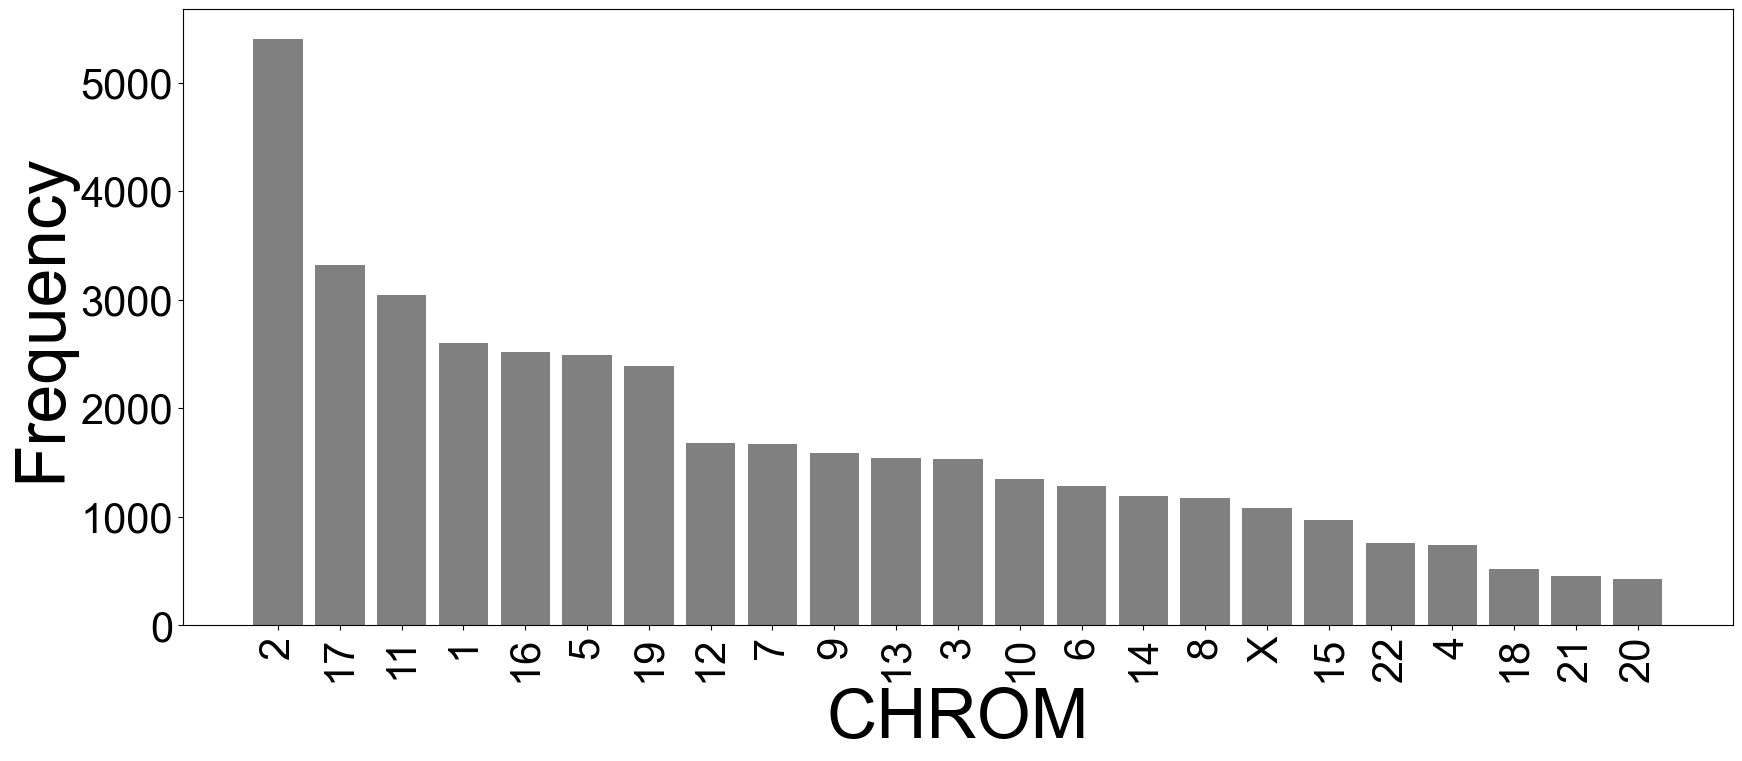

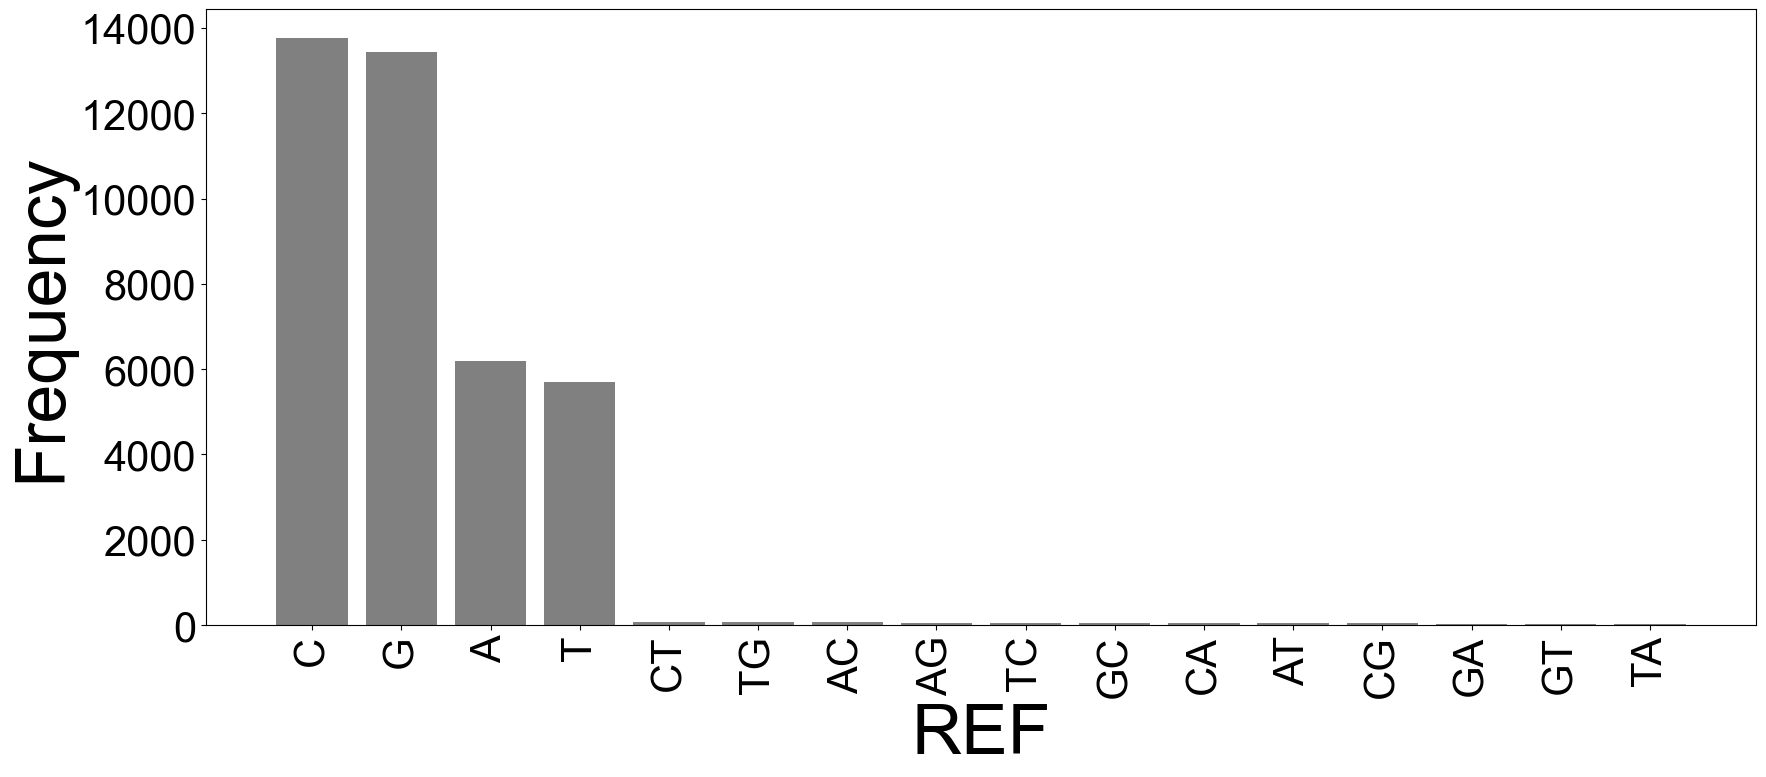

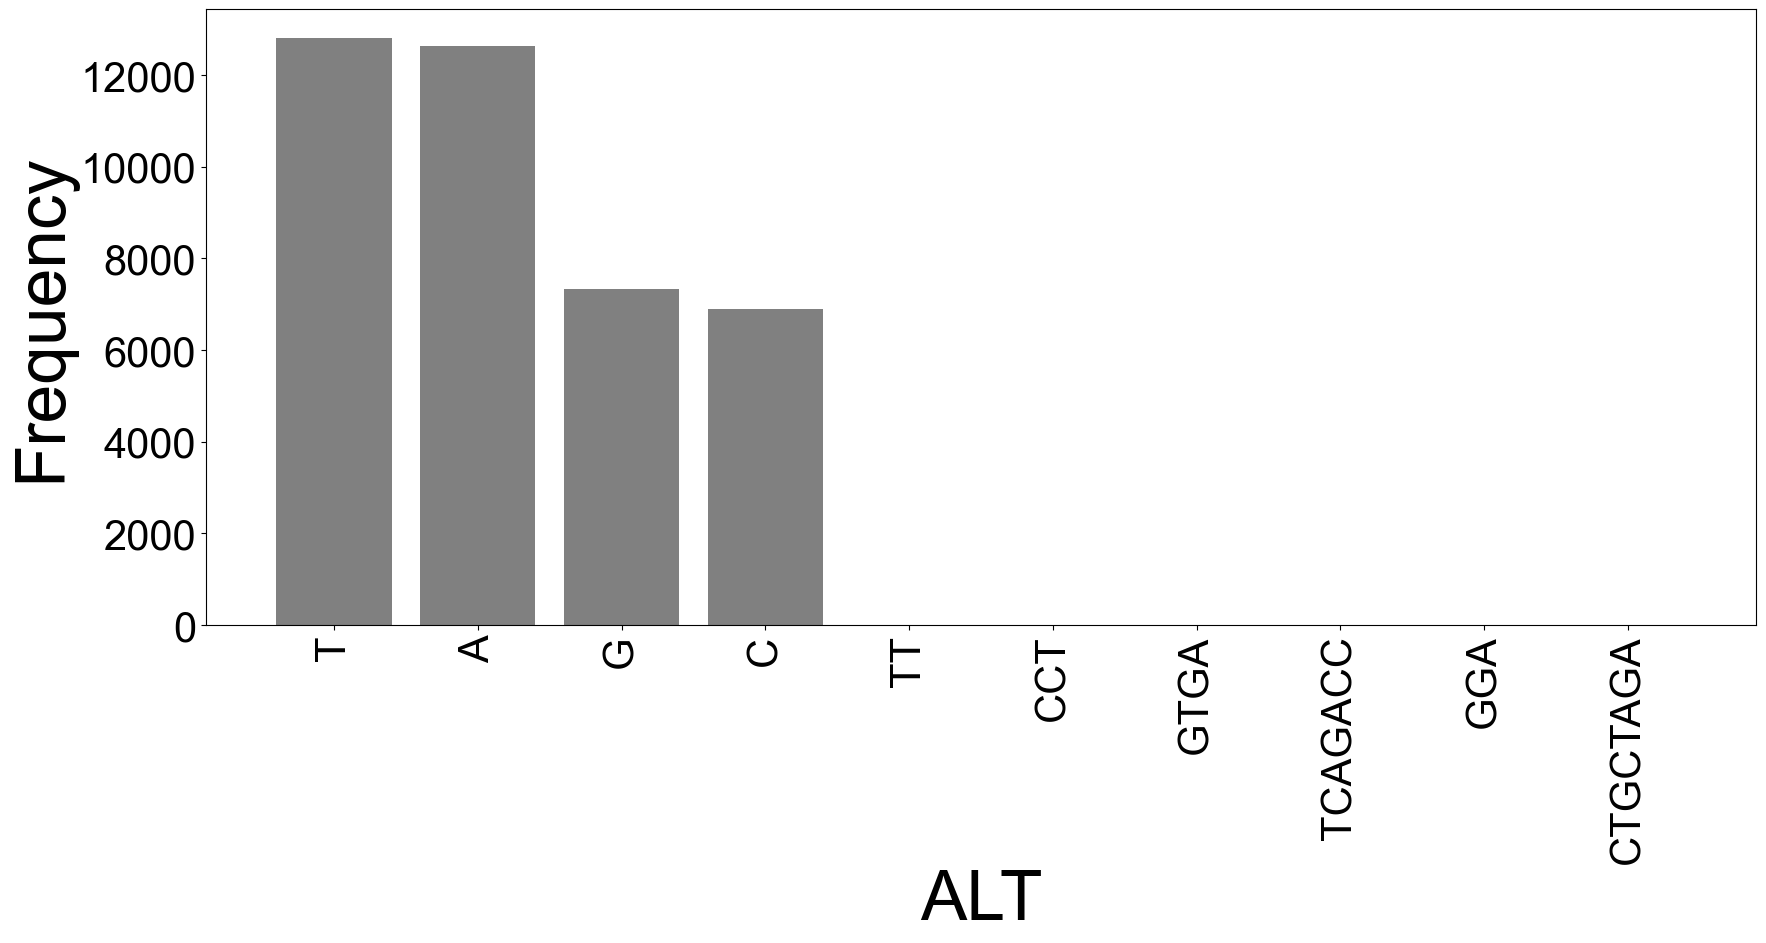

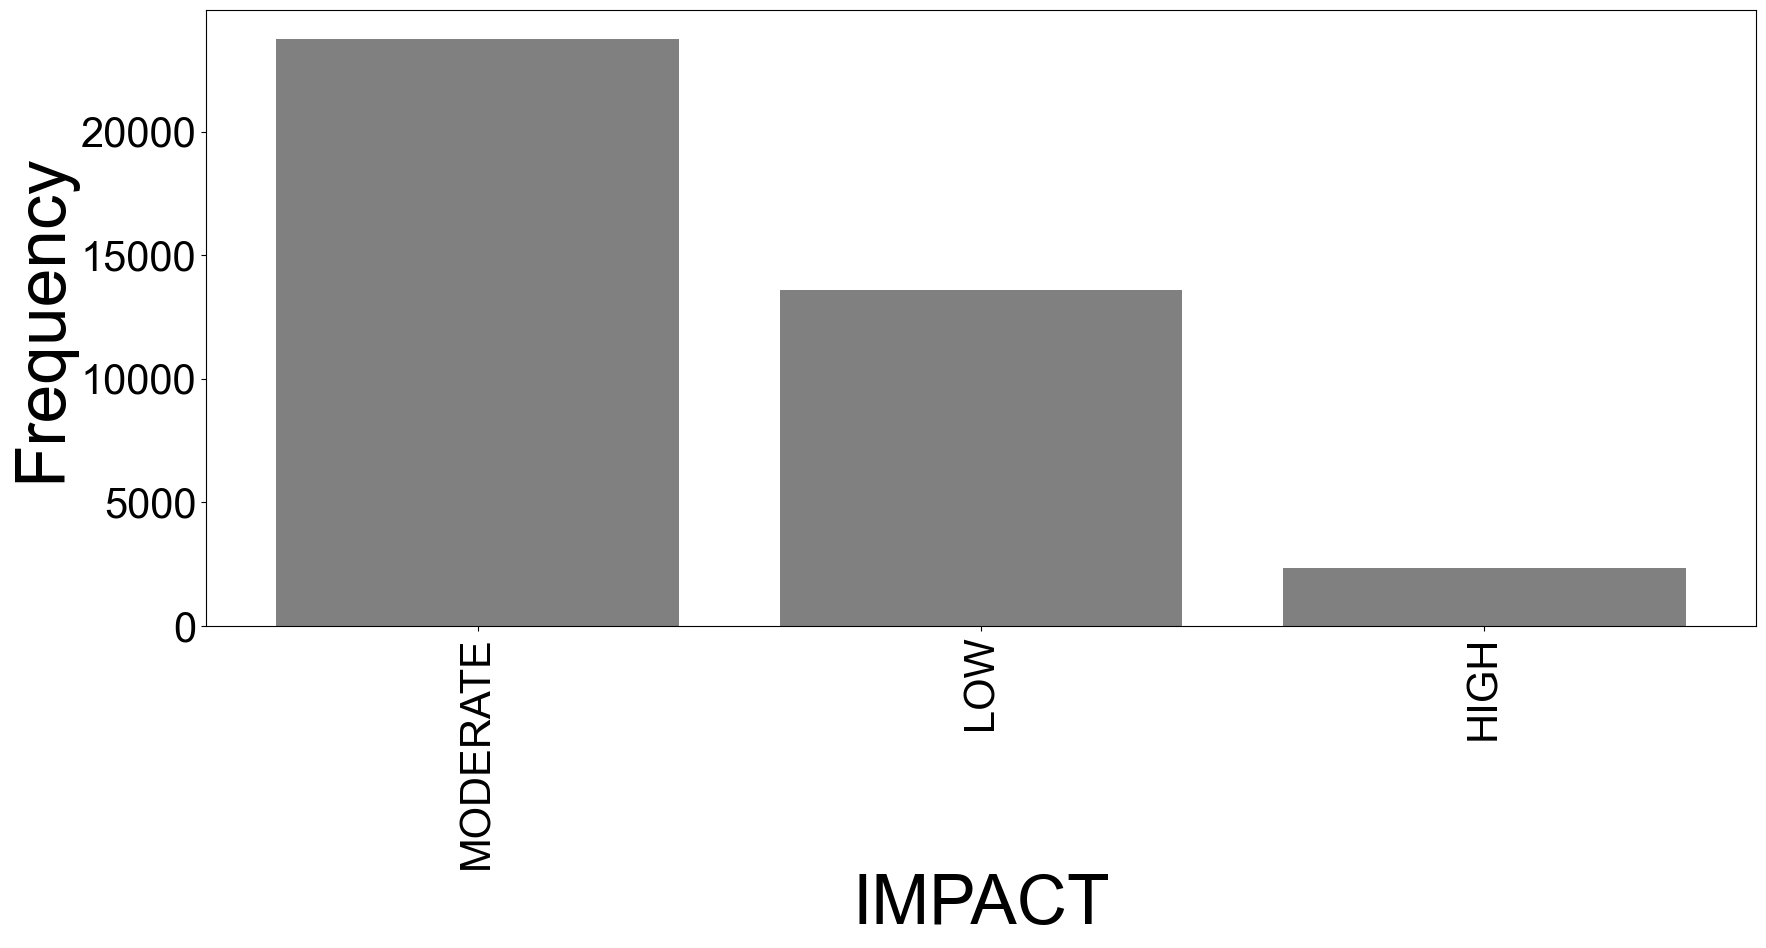

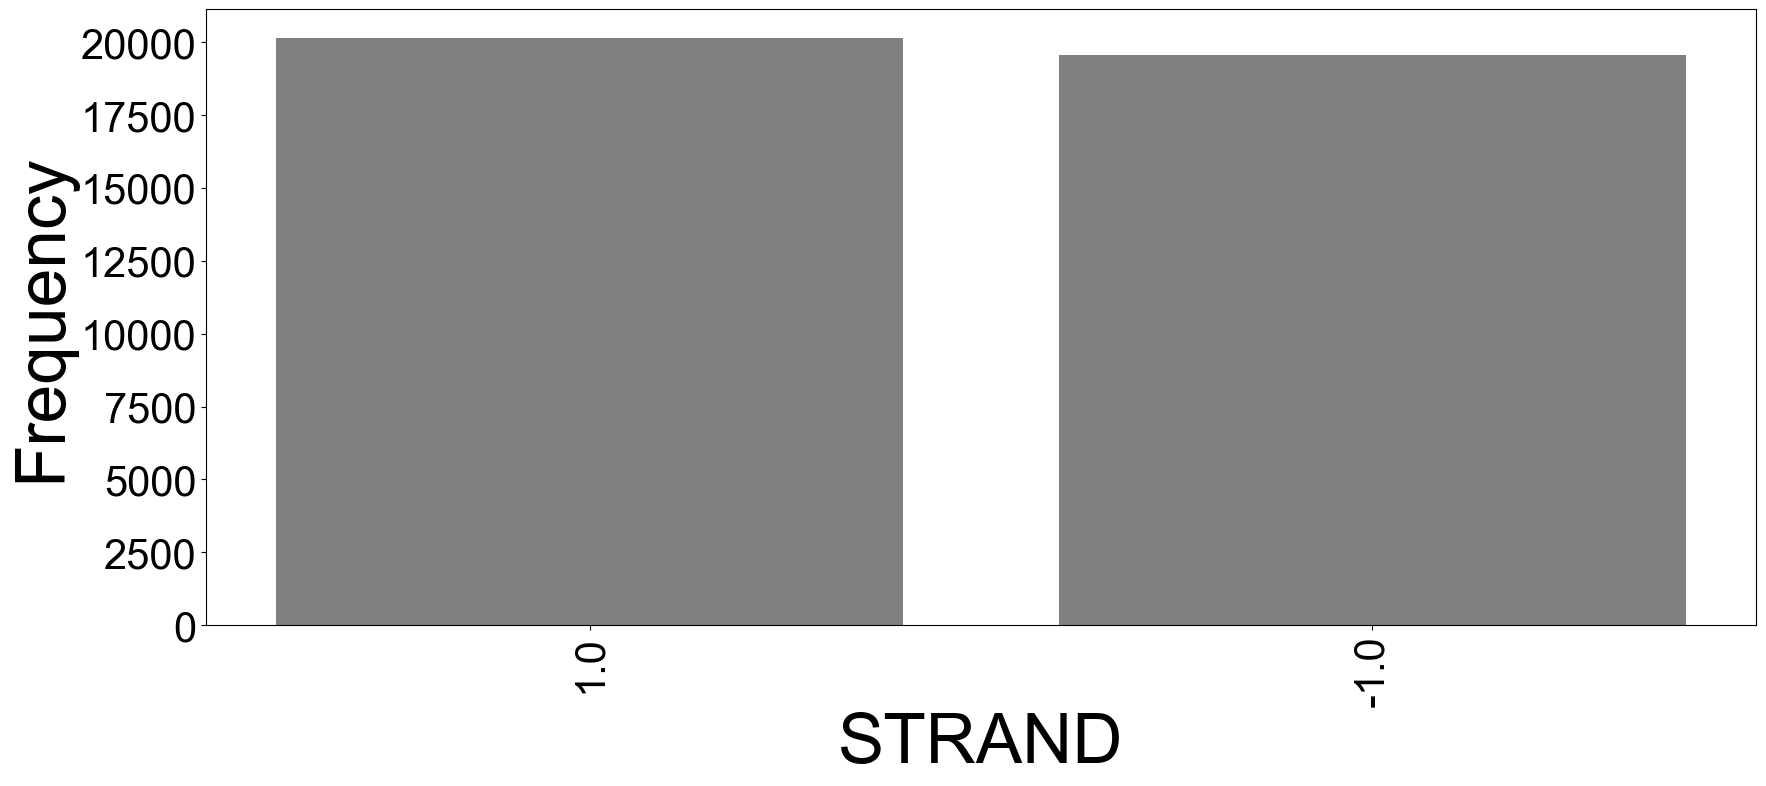

In [25]:
#making bar charts 
#learned some from here; https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
#asked for advice from chatgpt
import pandas as pd 
from matplotlib import pyplot as plt 

columns = ['CHROM', 'REF', 'ALT', 'IMPACT', 'STRAND']
#MC, Feature, Codons not used because too many categories
for column in columns:
    counts = df_cleaned[column].value_counts()
    plt.rcParams['font.family'] = 'Arial' 
    plt.figure(figsize = (20,8))
    plt.bar(counts.index.astype(str), counts.values, color = 'grey')
    plt.xticks(counts.index.astype(str), labels=counts.index.astype(str), rotation=90) 
    plt.xlabel(column, fontsize = 50) 
    plt.ylabel("Frequency", fontsize = 50) 
    plt.xticks(fontsize = 30) 
    plt.yticks(fontsize = 30) 
    plt.savefig(f'bar_chart_cleaned_{column}.png', dpi=400, bbox_inches = 'tight')
    plt.show()
    plt.close()